<a href="https://colab.research.google.com/github/Priyankansd/IT-496/blob/main/A5_Robinhood_of_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
myAPIKey = '02858189cd64488754115fea6a89087b'
stock ="HOOD"
balanceStatements = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements= requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()

In [3]:
print(balanceStatements)

[{'date': '2021-12-31', 'symbol': 'HOOD', 'reportedCurrency': 'USD', 'cik': '0001783879', 'fillingDate': '2022-02-24', 'acceptedDate': '2022-02-24 16:06:16', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 6253477000, 'shortTermInvestments': 27189000, 'cashAndShortTermInvestments': 6280666000, 'netReceivables': 6727226000, 'inventory': 0.0, 'otherCurrentAssets': 6275650000, 'totalCurrentAssets': 19283542000, 'propertyPlantEquipmentNet': 146419000, 'goodwill': 100521000, 'intangibleAssets': 34107000, 'goodwillAndIntangibleAssets': 134628000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 204590000, 'totalNonCurrentAssets': 485637000, 'otherAssets': 0.0, 'totalAssets': 19769179000, 'accountPayables': 252313000, 'shortTermDebt': 0.0, 'taxPayables': 0.0, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 12095029000, 'totalCurrentLiabilities': 12347342000, 'longTermDebt': 0.0, 'deferredRevenueNonCurrent': 0.0, 'deferredTaxLiabilitiesNonCurrent': 0.

In [5]:
threeYearBalanceStatement= balanceStatements[0:5]
threeYearIncomeStatement = incomeStatements[0:5]

In [6]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
calendarYear=[]
#gettting details
for i in range (0,3):
   calendarYear.append(threeYearIncomeStatement[i]['calendarYear'])
   profitabilityValue = threeYearIncomeStatement[i]['netIncome']/threeYearIncomeStatement[i]['revenue']
   profitability. append(profitabilityValue)
   assetTurnOverValue= threeYearIncomeStatement[i]['revenue']/threeYearBalanceStatement[i]['totalAssets']
   assetTurnOver.append(assetTurnOverValue)
   capitalStructureValue=threeYearBalanceStatement[i]['totalAssets']/threeYearBalanceStatement[i]['totalStockholdersEquity']
   capitalStructure.append(capitalStructureValue)
   returnOnEquityValue=profitabilityValue * assetTurnOverValue * capitalStructureValue
   returnOnEquity.append(returnOnEquityValue)
   print(returnOnEquity)
   

[-0.5054690109489912]
[-0.5054690109489912, -0.13464806044611546]
[-0.5054690109489912, -0.13464806044611546, 1.0981060918308465]


In [7]:
from collections import defaultdict
dataF1 = pd.DataFrame(columns = ['calendarYear','profitability','assetTurnOver','capitalStructure','returnOnEquity'] )
dataF1['calendarYear']  = calendarYear
dataF1['profitability'] =  profitability
dataF1['assetTurnOver'] =  assetTurnOver
dataF1['capitalStructure'] = capitalStructure
dataF1['returnOnEquity']  = returnOnEquity


print(dataF1)

  calendarYear  profitability  assetTurnOver  capitalStructure  returnOnEquity
0         2021      -2.030932       0.091817          2.710672       -0.505469
1         2020       0.007769       0.087258       -198.627562       -0.134648
2         2019      -0.383987       0.070361        -40.643805        1.098106


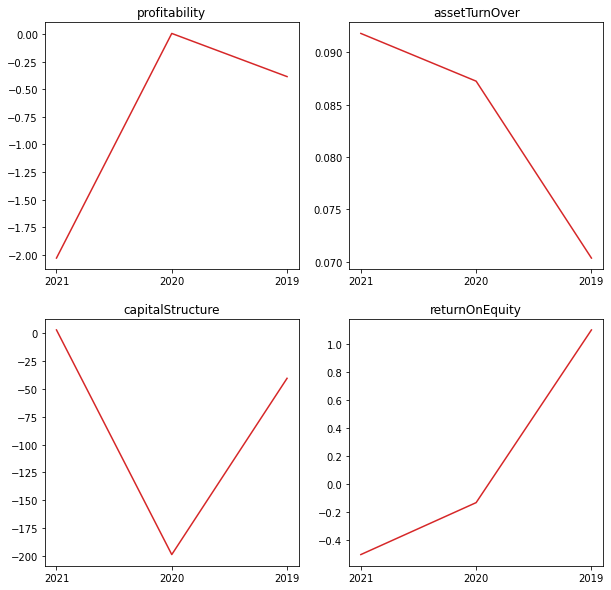

In [9]:
from typing import ValuesView
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
x = dataF1['calendarYear']


variables= ['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']

for i in range(0,2):
    for j in range(0, 2):
      valuesView= i* 2+j
      axs[i,j].plot (x, dataF1[variables[valuesView]],'tab:red')
      axs[i,j].set_title(variables[valuesView])
     